## 泰坦尼克号kaggle项目预测
- 数据集来自[kaggle官网](https://www.kaggle.com/c/titanic/data)  

参考[kaggle数据描述](https://www.kaggle.com/c/titanic/data)：
>Variable Notes  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  
parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

In [1]:
#导入所需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## 数据分析

- 导入数据

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### 描述性探索数据

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("SibSp 取值：",train_data['SibSp'].unique())
print("Parch 取值：",train_data['Parch'].unique())
print("Embarked 取值：",train_data['Embarked'].unique())

SibSp 取值： [1 0 3 4 2 5 8]
Parch 取值： [0 1 2 5 3 4 6]
Embarked 取值： ['S' 'C' 'Q' nan]


**其中**：Survived是否获救，2种取值；Pclass阶级，1表示上层，3种取值；SibSp兄弟姐妹配偶数，取值0-5、8；Parch父母子女数，取值0-6；Embarked登船地点，3种取值，S/C/Q


In [5]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Newell, Miss. Madeleine",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**分析**：  
Age：最小几个月的婴儿，到80岁老人，平均30岁  
Fare:从0-512的都有，14居多，大多数费用在31及以下  
Embarked:有3种取值，其中S取值最高646次

- 数据类型、缺失值查看

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**分析**：训练数据集，Age、Cabin、Embarked 有缺失  
Age缺失：177  
Cabin缺失：687  
Embarked：2

In [9]:
print(pd.isnull(test_data).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**分析**：测试数据集，Age、Fare缺失  
Age：缺失86 项   
Fare：缺失1项

- 查看是否有重复值

In [10]:
train_data.duplicated().sum()

0

In [11]:
test_data.duplicated().sum()

0

- 简单查看数据分布情况

In [12]:
print(train_data.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [13]:
print (train_data.groupby('Survived')['Sex'].value_counts())

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64


In [14]:
print (train_data.groupby('Survived')['Pclass'].value_counts())

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64


### 可视化探索

- Survived分析

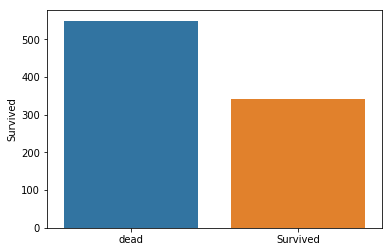

In [15]:
sns.barplot(x=['dead','Survived'],y=train_data['Survived'].value_counts());

- Sex  and Survived  
可以发现female获救概率大

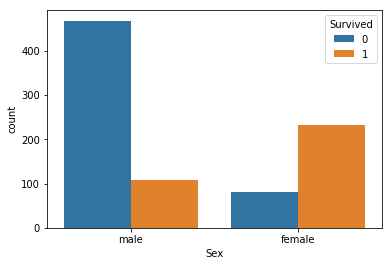

In [16]:
sns.countplot(x='Sex', data=train_data, hue='Survived');

- Pcalss and Survivde  
可以发现Pclass=1，获救概率大

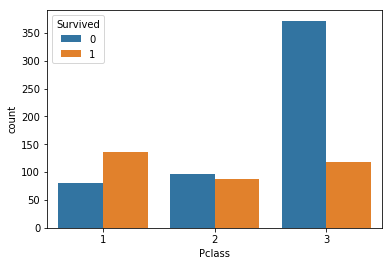

In [17]:
sns.countplot(x='Pclass',data=train_data,hue='Survived');

- SibSp and Survived

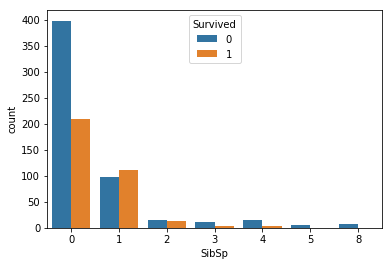

In [18]:
sns.countplot(x='SibSp',hue='Survived',data=train_data);

- Parch and Survived

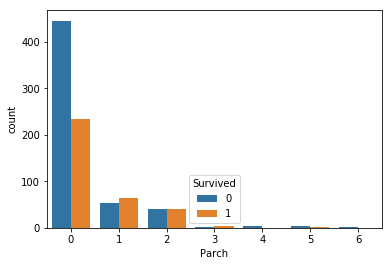

In [19]:
sns.countplot(x='Parch',hue='Survived',data=train_data,);

- Fare

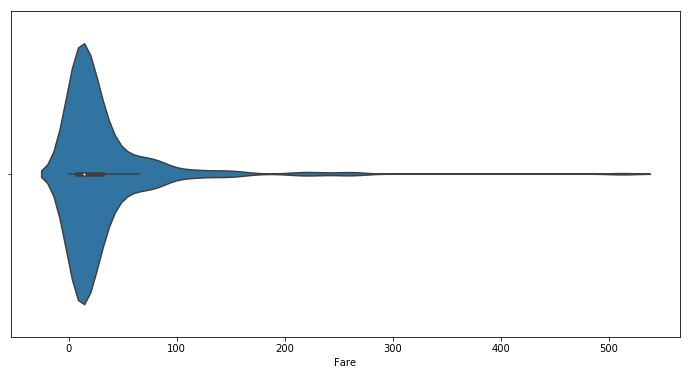

In [20]:
plt.figure(figsize=(12,6))
g = sns.violinplot(train_data.Fare);
plt.show()

- Age

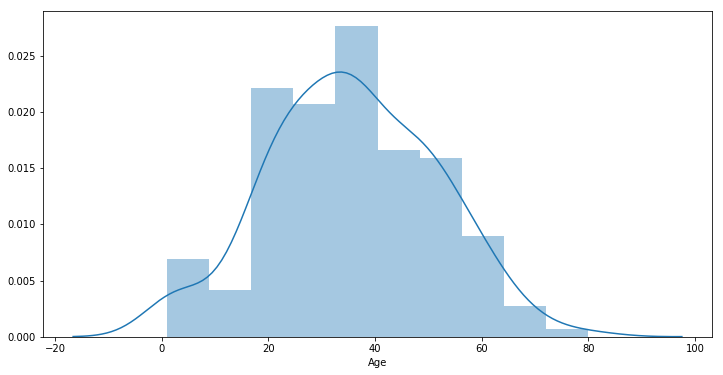

In [21]:
plt.figure(figsize=(12,6))
g = sns.distplot(train_data.dropna().Age);
plt.show()

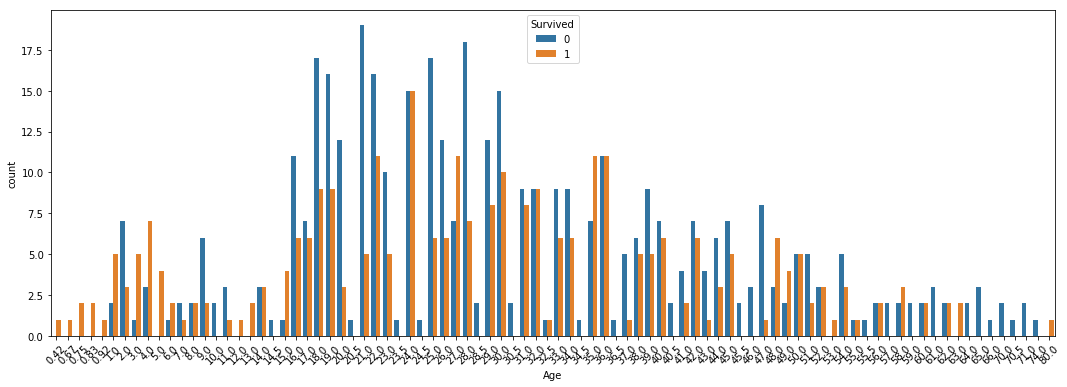

In [22]:
plt.figure(figsize=(18,6))
g = sns.countplot(x='Age',hue='Survived',data=train_data);
plt.xticks(rotation=45)
plt.show()

## 数据处理

- cabin遗失值太多，删除  
- ticket码繁多，和目标Survived关系小，删除

In [23]:
train_data.drop(['Cabin','Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin','Ticket'], axis=1, inplace=True)

### 缺失值处理   
其中Age缺失值太多，对Survived影响较大，特殊处理

- train_data：Emarked

In [24]:
train_data['Embarked'].isnull().sum()

2

In [25]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
train_data.fillna({'Embarked':'S'},inplace=True)

- test_data:Fare

In [27]:
test_data.fillna({'Fare':train_data.Fare.median()},inplace=True)

### 特征类型转换

In [28]:
train_data['Sex'] = train_data['Sex'].map({'male':1,'female':0})
test_data['Sex'] = test_data['Sex'].map({'male':1,'female':0})

In [29]:
train_data['Embarked']=train_data['Embarked'].replace(['S','C','Q'],[1,2,3])
test_data['Embarked']=test_data['Embarked'].replace(['S','C','Q'],[1,2,3])

### Fare离散处理  
fare，离散分作：min-25%,25%-50%,%50%-75%,>75%

In [30]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
f_a,f_b,f_c = np.percentile(train_data['Fare'], [25, 50, 75])

In [32]:
f_a,f_b,f_c

(7.9104, 14.4542, 31.0)

In [33]:
fare_median = train_data.Fare.median()
train_data['Fare'] = train_data['Fare'].map(lambda x:0 if x<=f_a else 1 if x<=f_b else 2 if x<=f_c else 3)
test_data['Fare'] = test_data['Fare'].map(lambda x:0 if x<=f_a else 1 if x<=f_b else 2 if x<=f_c else 3)

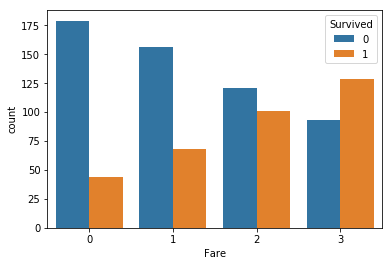

In [34]:
sns.countplot(x=train_data['Fare'],data = train_data,hue='Survived');

### 分析Name

In [35]:
print(train_data.Name[:5])

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


In [36]:
train_data['NewName'] = train_data.Name.map(lambda x: re.compile(r",\s(.*?)\.").findall(x)[0])
test_data['NewName'] = test_data.Name.map(lambda x: re.compile(r",\s(.*?)\.").findall(x)[0])

In [37]:
train_data['NewName'][0]

'Mr'

In [38]:
len(train_data['NewName'][0])

2

In [39]:
train_data['NewName'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [40]:
train_data['NewName']= pd.factorize(train_data['NewName'])[0]
test_data['NewName']= pd.factorize(test_data['NewName'])[0]

In [41]:
train_data.drop('Name',inplace=True,axis=1)
test_data.drop('Name',inplace=True,axis=1)

### 分析Age

#### Age缺失值

- 处理Age,使用其它特征对Age进行预测

In [42]:
age_train = train_data[train_data['Age'].notnull()]
age_test = train_data[train_data['Age'].isnull()]

In [43]:
age_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewName
5,6,0,3,1,NaN,0,0,1,3,0
17,18,1,2,1,NaN,0,0,1,1,0
19,20,1,3,0,NaN,0,0,0,2,1
26,27,0,3,1,NaN,0,0,0,2,0
28,29,1,3,0,NaN,0,0,0,3,2


In [44]:
age_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewName
0,1,0,3,1,22.0,1,0,0,1,0
1,2,1,1,0,38.0,1,0,3,2,1
2,3,1,3,0,26.0,0,0,1,1,2
3,4,1,1,0,35.0,1,0,3,1,1
4,5,0,3,1,35.0,0,0,1,1,0


In [45]:
# 去掉'Survived'列，为预测test数据集
age_feature = age_train.drop(['Age','PassengerId','Survived'],axis=1)
age_label = age_train['Age']

In [46]:
from sklearn.ensemble import RandomForestRegressor as RFR
age_clt = RFR(random_state=0).fit(age_feature,age_label)

In [47]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewName
0,1,0,3,1,22.0,1,0,0,1,0
1,2,1,1,0,38.0,1,0,3,2,1
2,3,1,3,0,26.0,0,0,1,1,2
3,4,1,1,0,35.0,1,0,3,1,1
4,5,0,3,1,35.0,0,0,1,1,0


In [48]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewName
0,892,3,1,34.5,0,0,0,3,0
1,893,3,0,47.0,1,0,0,1,1
2,894,2,1,62.0,0,0,1,3,0
3,895,3,1,27.0,0,0,1,1,0
4,896,3,0,22.0,1,1,1,1,1


In [49]:
#train_data[train_data['Age'].isnull()]['Age'] = age_clt.predict(age_test.drop(['Age','PassengerId'],axis=1))
train_data.loc[train_data['Age'].isnull(),'Age'] = age_clt.predict(age_test.drop(['Age','PassengerId','Survived'],axis=1))

test_data Age：

In [50]:
test_data.loc[test_data['Age'].isnull(),'Age'] = age_clt.predict(test_data[test_data['Age'].isnull()].drop(['Age','PassengerId'],axis=1))

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Embarked       891 non-null int64
NewName        891 non-null int64
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
NewName        418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


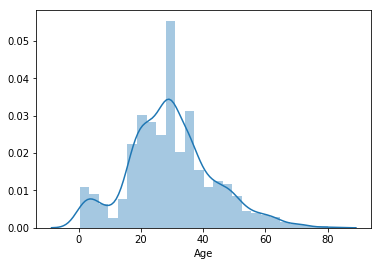

In [53]:
sns.distplot(train_data['Age']);

- 对连续性的年龄进行分组归类

In [54]:
train_data.Age.min()

0.42

- Age离散化新特征

In [55]:
train_data['NewAge'] = train_data['Age'].map(lambda x:0 if x==0 else 1 if x<6 else 2 if x<16 else 3 if x<26 else
                                          4 if x<36 else 5 if x<46 else 6 if x<56 else 7 if x<66 else 8)

test_data['NewAge'] = test_data['Age'].map(lambda x:0 if x==0 else 1 if x<6 else 2 if x<16 else 3 if x<26 else
                                          4 if x<36 else 5 if x<46 else 6 if x<56 else 7 if x<66 else 8)

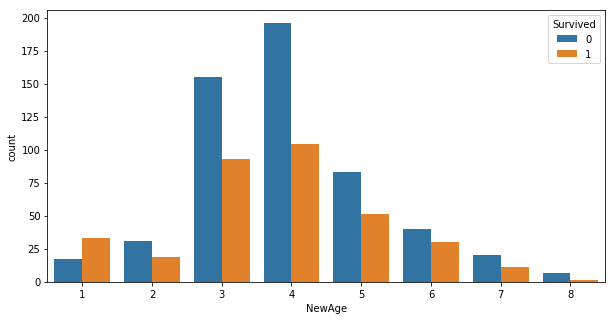

In [56]:
plt.figure(figsize=(10,5))
g = sns.countplot(train_data['NewAge'],hue=train_data['Survived']);
plt.show()

- 新特征  
已经创建新特征：NewName,将父母兄弟姐妹组合成新特征：SP

In [57]:
train_data['SP'] = train_data['SibSp'] + train_data['Parch']
test_data['SP'] = test_data['SibSp'] + test_data['Parch']

### 数据清理结果

In [58]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewName,NewAge,SP
422,423,0,3,1,29.000000,0,0,0,1,0,4,0
763,764,1,1,0,36.000000,1,2,3,1,1,5,3
420,421,0,3,1,29.547935,0,0,0,2,0,4,0
677,678,1,3,0,18.000000,0,0,1,1,2,3,0
844,845,0,3,1,17.000000,0,0,1,1,0,3,0


In [59]:
test_data.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewName,NewAge,SP
55,947,3,1,10.000000,4,1,2,3,3,2,5
383,1275,3,0,19.000000,1,0,2,1,1,3,1
251,1143,3,1,20.000000,0,0,1,1,0,3,0
58,950,3,1,29.088016,1,0,2,1,0,4,1
330,1222,2,0,48.000000,0,2,3,1,1,6,2


## 训练模型

### 划分数据

In [60]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','NewName','NewAge','SP']

In [61]:
labels = train_data['Survived']

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data[features], labels, test_size=0.2, random_state=2)

In [63]:
print ('训练集样本数:{},验证集样本数：{}'.format(x_train.shape[0],x_test.shape[0]))

训练集样本数:712,验证集样本数：179


### 开始训练模型

- base line  
获救人少，假定都没有获救

In [64]:
train_data.query('Survived == 0').Survived.count()/train_data.Survived.count()

0.6161616161616161

### 导入模型

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

RD = 22

clf_lr =  LogisticRegression(C=50,random_state=RD)
clf_gnb = GaussianNB()
clf_dtc = DecisionTreeClassifier(max_depth=3,random_state=RD)
clf_knc = KNeighborsClassifier()
clf_svc = SVC(C=3,random_state=RD)
clf_rfc = RandomForestClassifier(max_depth=5,random_state=RD)
clf_gbc = GradientBoostingClassifier(random_state=RD,min_samples_leaf=2)
clf_etc = ExtraTreesClassifier(random_state=RD,max_depth=5,min_samples_leaf=3)
clf_abc = AdaBoostClassifier(base_estimator=clf_dtc,random_state=RD,learning_rate=0.01,n_estimators=100)
clf_mlpc = MLPClassifier(random_state=RD,activation='tanh',solver='lbfgs',hidden_layer_sizes=(8,64,2))
clf_lgbmc = LGBMClassifier(random_state=RD,reg_lambda=0.6)
clf_xgbc = XGBClassifier(random_state=RD,colsample_bylevel=0.4,reg_alpha=0.1)

### 模型调参

- 重新划分数据(调参结束关闭)

In [66]:
# X_train, x_test, Y_train, y_test = train_test_split(train_data[features], labels, test_size=0.2, random_state=2)
# x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2)

- 交叉验证

In [67]:
from sklearn.model_selection import KFold, GridSearchCV
def cx(model, params=None):
    k = KFold(5, random_state=22)
    score =make_scorer(dzscore)
    grid_ = GridSearchCV(estimator=model, param_grid=params, scoring=score, cv=k)
    grid_.fit(np.array(x_train), np.array(y_train))
    print(grid_.best_params_ )
    return grid_.best_estimator_

- 评分方法

In [68]:
from sklearn.metrics import accuracy_score,make_scorer

def dzscore(y_true, y_pred):
    sc = accuracy_score(y_true, y_pred)
    return sc

### 挑选模型

In [69]:
clfs = [clf_lr, clf_gnb,clf_dtc,clf_knc, clf_svc, clf_rfc, clf_gbc, clf_etc, clf_abc, clf_mlpc, clf_lgbmc, clf_xgbc]
clfs_name = ['clf_lr','clf_gnb', 'clf_dtc', 'clf_knc', 'clf_svc', 'clf_rfc',
             'clf_gbc', 'clf_etc', 'clf_abc', 'clf_mlpc', 'clf_lgbmc', 'clf_xgbc']
scoring = make_scorer(dzscore)

In [70]:
# from sklearn.model_selection import cross_val_score

# results = {}
# for clf,cname in zip(clfs,clfs_name):
#     k = KFold(n_splits=7, random_state=22)
#     cv_result = cross_val_score(clf, x_train, y_train, cv=k, scoring=scoring)
#     results[cname] = [cv_result.mean(),cv_result.std()]

In [71]:
# results

**小结**：  
{'clf_abc': [0.8243614277394126, 0.03125662047121815],  
 'clf_dtc': [0.8229747344482348, 0.026118094811711855],  
 'clf_etc': [0.8299498017028594, 0.0367912022149891],  
 'clf_gbc': [0.8230440691127937, 0.02715585232666028],  
 'clf_gnb': [0.7751892836342458, 0.04112692451869125],  
 'clf_knc': [0.7697118451340932, 0.021009698483804677],  
 'clf_lgbmc': [0.8160412679923453, 0.03862294070470728],  
 'clf_lr': [0.8032975566464209, 0.027327696659455048],  
 'clf_mlpc': [0.8046981168705106, 0.028533336550128876],  
 'clf_rfc': [0.8356352441966886, 0.035237718310626526],  
 'clf_svc': [0.8089413983415147, 0.026997803731159252],  
 'clf_xgbc': [0.8314196965915078, 0.03053624573104041]}  

### 模型融合

In [72]:
# x_test预测score
clf_score = {}

# test集预测值
clf_pred = {}

# mlxtend模型融合 clfs器
clfs = [clf_lr, clf_gnb,clf_dtc,clf_knc, clf_svc, clf_rfc, clf_gbc, clf_etc, clf_abc, clf_mlpc, clf_lgbmc, clf_xgbc]
clfs_name = ['clf_lr','clf_gnb', 'clf_dtc', 'clf_knc', 'clf_svc', 'clf_rfc',
             'clf_gbc', 'clf_etc', 'clf_abc', 'clf_mlpc', 'clf_lgbmc', 'clf_xgbc']

- 筛选模型

In [73]:
for clf, name in zip(clfs, clfs_name):
    
    clf = clf.fit(np.array(x_train), np.array(y_train))
    clf_score[name] = dzscore(y_test,clf.predict(np.array(x_test)))
    clf_pred[name] = clf.predict(np.array(test_data[features]))

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

In [74]:
clf_score

{'clf_abc': 0.8044692737430168,
 'clf_dtc': 0.7932960893854749,
 'clf_etc': 0.8100558659217877,
 'clf_gbc': 0.8044692737430168,
 'clf_gnb': 0.7653631284916201,
 'clf_knc': 0.7430167597765364,
 'clf_lgbmc': 0.7877094972067039,
 'clf_lr': 0.7597765363128491,
 'clf_mlpc': 0.7821229050279329,
 'clf_rfc': 0.8044692737430168,
 'clf_svc': 0.7486033519553073,
 'clf_xgbc': 0.8100558659217877}

In [75]:
np.array(test_data[features]).size>0

True

- 模型集成

In [76]:
df_score = pd.DataFrame(clf_score, index=[0])
df_score.head()

,clf_abc,clf_dtc,clf_etc,clf_gbc,clf_gnb,clf_knc,clf_lgbmc,clf_lr,clf_mlpc,clf_rfc,clf_svc,clf_xgbc
0,0.804469,0.793296,0.810056,0.804469,0.765363,0.743017,0.787709,0.759777,0.782123,0.804469,0.748603,0.810056


In [77]:
df_pred = pd.DataFrame(clf_pred)
df_pred.head(3)

,clf_abc,clf_dtc,clf_etc,clf_gbc,clf_gnb,clf_knc,clf_lgbmc,clf_lr,clf_mlpc,clf_rfc,clf_svc,clf_xgbc
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0


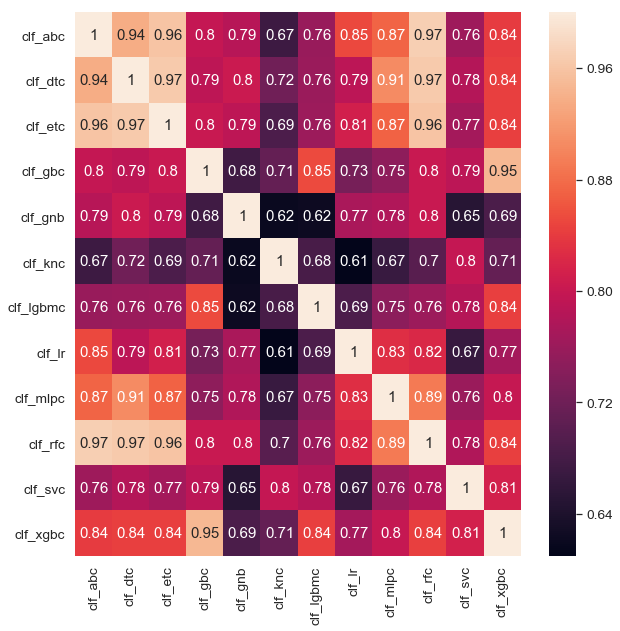

In [78]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df_pred.values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm,cbar=True, annot=True,annot_kws={'size':15},xticklabels=df_pred.columns,yticklabels=df_pred.columns)
plt.show()

In [79]:
from sklearn.ensemble import VotingClassifier

vclf = VotingClassifier(estimators=[('clf_lr',clf_lr),('clf_gnb',clf_gnb),('clf_knc',clf_knc),('clf_etc',clf_etc),
                         ('clf_svc',clf_svc),('clf_mlpc',clf_mlpc),('clf_lgbmc',clf_lgbmc),('clf_xgbc',clf_xgbc)])
vclf = vclf.fit(np.array(x_train), np.array(y_train))
clf_score['vclf'] = dzscore(y_test,vclf.predict(np.array(x_test)))
clf_pred['vclf'] = vclf.predict(np.array(test_data[features]))

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

## 结果

In [80]:
clf_best = vclf

### 导出结果

In [81]:
test_data.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewName,NewAge,SP
0,892,3,1,34.5,0,0,0,3,0,4,0
1,893,3,0,47.0,1,0,0,1,1,6,1
2,894,2,1,62.0,0,0,1,3,0,7,0


In [82]:
ids = test_data['PassengerId']
predictions = clf_best.predict(np.array(test_data[features]))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
sub = pd.read_csv('submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
